In [2]:
# %pip install pandas
# %pip install matplotlib
# %pip install scipy
# %pip install seaborn
# %pip install numpy

In [3]:
import pandas
import matplotlib.pyplot
import seaborn
import numpy

In [26]:
survey = pandas.read_csv( '../data/Chatbots Impact on University Learning/chatbots_cleaned.csv' )
survey.head()

,Timestamp,Q1,Q2,Q3,Q4,Q5.1,Q5.2,Q5.3,Q5.4,Q5.5,...,Q8.2,Q8.3,Q8.4,Q8.5,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,5.14.2023 21:22:19,Master,International Economic Relations,Female,Îften,Agree,Agree,Strongly Agree,Strongly Agree,Agree,...,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,NaN
1,5.15.2023 8:45:52,Bachelor,International Economic Relations,Female,Sometimes,Disagree,Agree,Disagree,Strongly Disagree,Neutral,...,Agree,Agree,Disagree,Neutral,Neutral,Agree,Neutral,Disagree,Disagree,NaN
2,5.15.2023 9:54:15,Bachelor,International Economic Relations,Female,Rarely,Neutral,Neutral,Neutral,Disagree,Neutral,...,Agree,Agree,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Neutral,NaN
3,5.15.2023 15:17:41,Bachelor,International Economic Relations,Female,Rarely,Agree,Agree,Agree,Disagree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,NaN
4,5.15.2023 15:19:02,Bachelor,International Economic Relations,Female,Sometimes,Agree,Agree,Neutral,Disagree,Agree,...,Agree,Agree,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,NaN


In [27]:
survey_coded = pandas.read_csv( '../data/Chatbots Impact on University Learning/chatbots_cleaned_coded.csv' )
survey_coded.head()

,Timestamp,Q1,Q2,Q3,Q4,Q5.1,Q5.2,Q5.3,Q5.4,Q5.5,...,Q8.2,Q8.3,Q8.4,Q8.5,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,5.14.2023 21:22:19,2,International Economic Relations,1,4,4,4,5,5,4,...,5,5,4,5,4,5,5,4,4,NaN
1,5.15.2023 8:45:52,1,International Economic Relations,1,3,2,4,2,1,3,...,4,4,2,3,3,4,3,2,2,NaN
2,5.15.2023 9:54:15,1,International Economic Relations,1,2,3,3,3,2,3,...,4,4,3,3,3,3,2,2,3,NaN
3,5.15.2023 15:17:41,1,International Economic Relations,1,2,4,4,4,2,4,...,4,4,4,4,4,4,3,4,4,NaN
4,5.15.2023 15:19:02,1,International Economic Relations,1,3,4,4,3,2,4,...,4,4,3,3,3,3,3,3,3,NaN


In [24]:
def generate_distplot_numeric( data, unique_values, title = "" ):
    plot = seaborn.displot( data, bins = unique_values, kde = True )

    bin_edges = numpy.linspace( data.min(), data.max(), unique_values + 1 )
    tick_positions = ( bin_edges[:-1] + bin_edges[1:] ) / 2
    for ax in plot.axes.flat:
        ax.set_xticks( tick_positions )
        ax.set_xticklabels( range( 1, unique_values + 1 ) )
        ax.set_xlim( bin_edges[0], bin_edges[-1] )

    matplotlib.pyplot.title( title )

    print( data.describe() )

    matplotlib.pyplot.show()

def generate_distplot_text( data, labels, unique_values, title = "" ):
    plot = seaborn.displot( data, bins = unique_values, kde = True )

    bin_edges = numpy.linspace( data.min(), data.max(), unique_values + 1 )
    tick_positions = ( bin_edges[:-1] + bin_edges[1:] ) / 2
    for ax in plot.axes.flat:
        ax.set_xticks( tick_positions )
        ax.set_xticklabels( labels )
        ax.set_xlim( bin_edges[0], bin_edges[-1] )

    matplotlib.pyplot.title( title )

    matplotlib.pyplot.xticks( rotation = 45, ha = 'right' )

    print( data.describe() )

    matplotlib.pyplot.show()

def generate_barplot( data, title = "" ):
    split_responses = [ response.split(';') for response in data ]
    counter = {}
    for response in split_responses:
        for choice in response:
            if choice in counter:
                counter[ choice ] += 1
            else:
                counter[ choice ] = 1

    seaborn.barplot(
        pandas.DataFrame( list( counter.items() ), columns = ['Choice', 'Count'] ),
        y = 'Choice',
        x = 'Count'
    )

    matplotlib.pyplot.title( title )

    matplotlib.pyplot.show()

In [41]:
frequency_text_responses = ["Never", "Rarely", "Sometimes", "Often", "Very often"]
agreement_text_responses = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]

**Question 1:** What is your academic level?

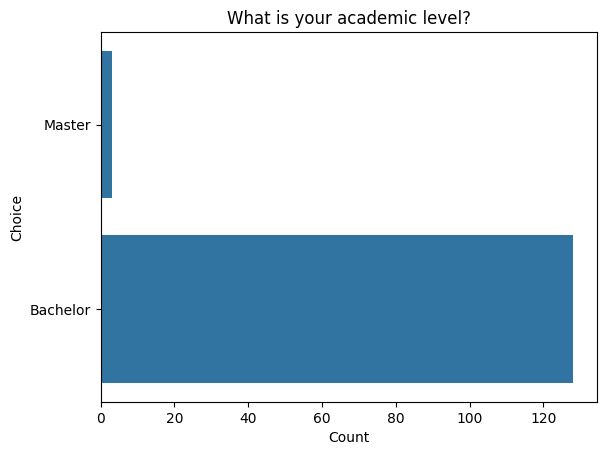

In [28]:
generate_barplot( survey['Q1'], "What is your academic level?" )

**Question 2:** What is your major?

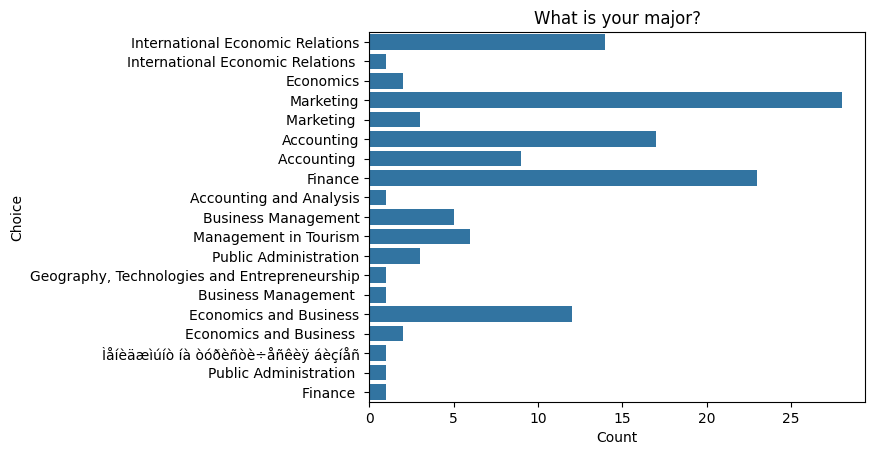

In [29]:
generate_barplot( survey['Q2'], "What is your major?" )

**Question 3:** What is your gender?

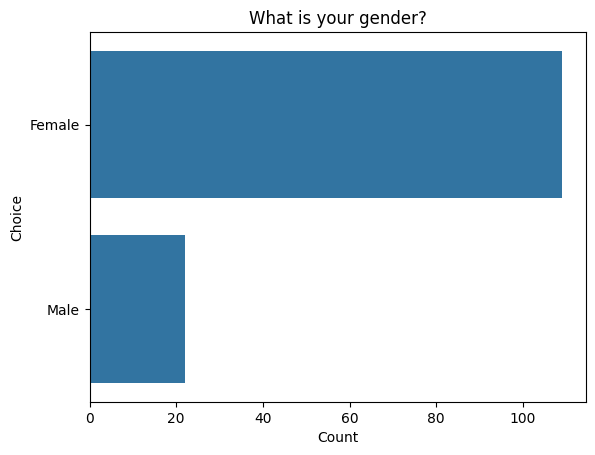

In [31]:
generate_barplot( survey['Q3'], "What is your gender?" )

**Question 4:** Have you ever used generative AI technologies like ChatGPT?

count    131.000000
mean       2.801527
std        1.010863
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Q4, dtype: float64


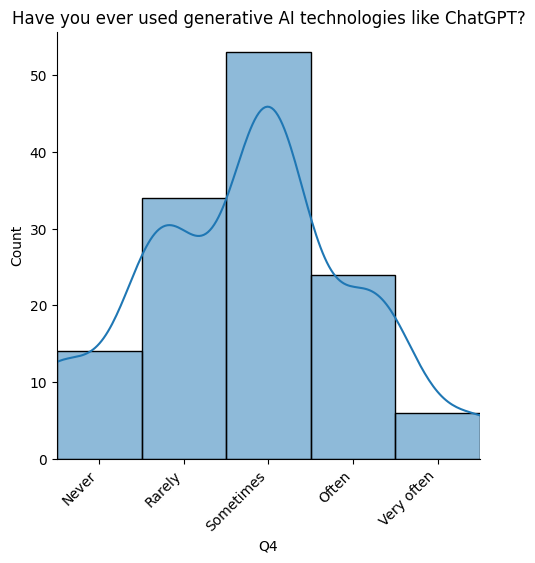

In [42]:
generate_distplot_text( survey_coded['Q4'], frequency_text_responses, 5, "Have you ever used generative AI technologies like ChatGPT?" )

**Question 5:** Knowledge of Generative AI Technologies

count    131.000000
mean       3.251908
std        0.947414
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q5.1, dtype: float64


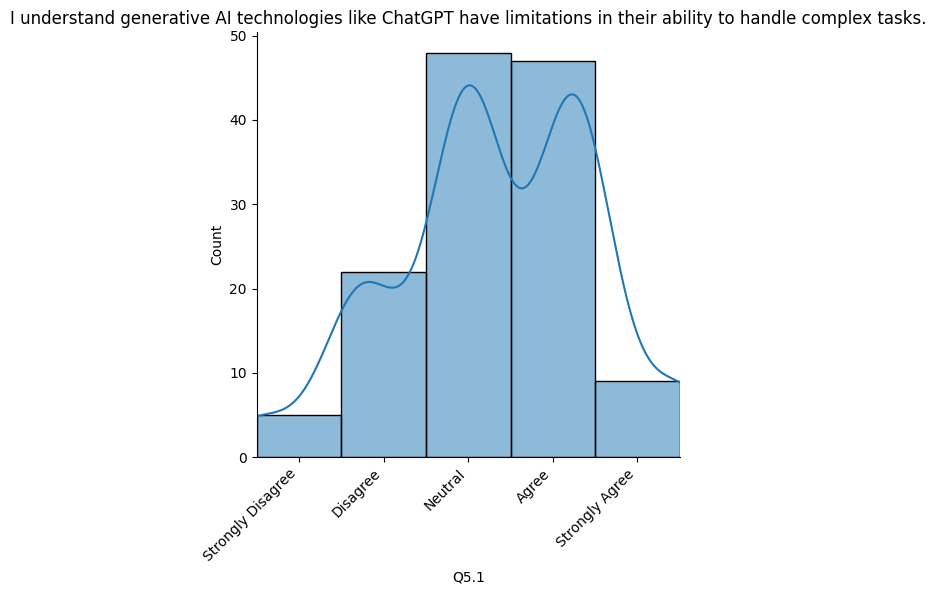

count    131.000000
mean       3.404580
std        0.982764
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q5.2, dtype: float64


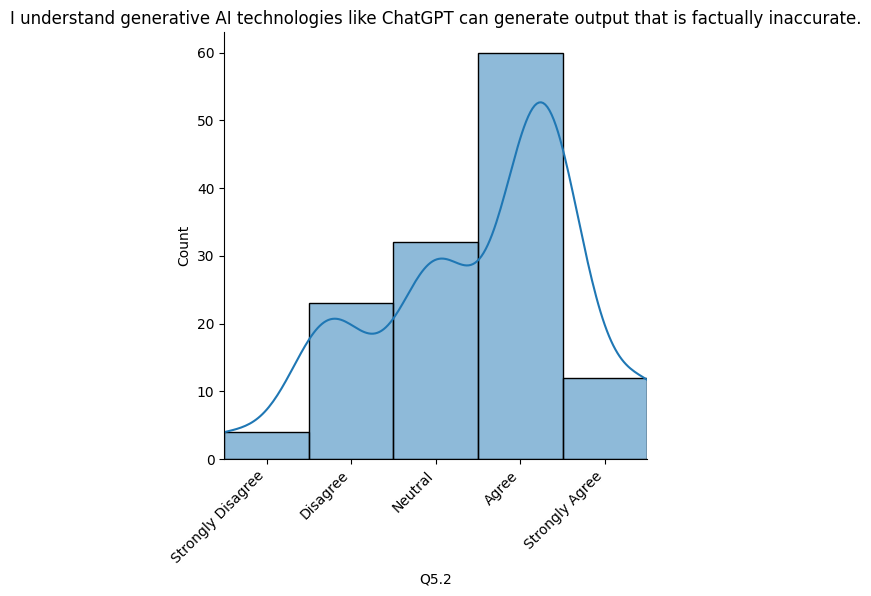

count    131.000000
mean       3.320611
std        0.962906
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q5.3, dtype: float64


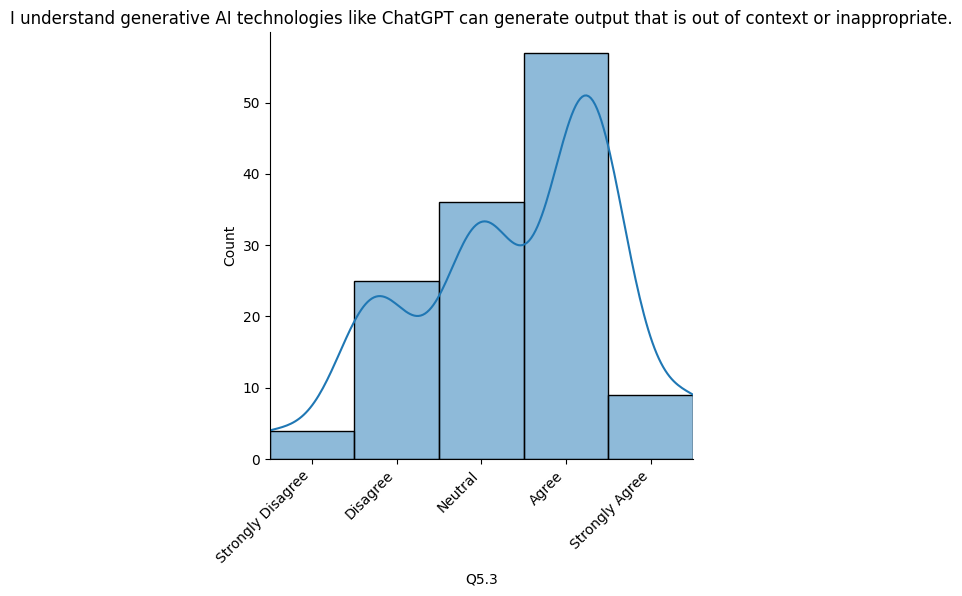

count    131.000000
mean       2.465649
std        1.017521
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Q5.4, dtype: float64


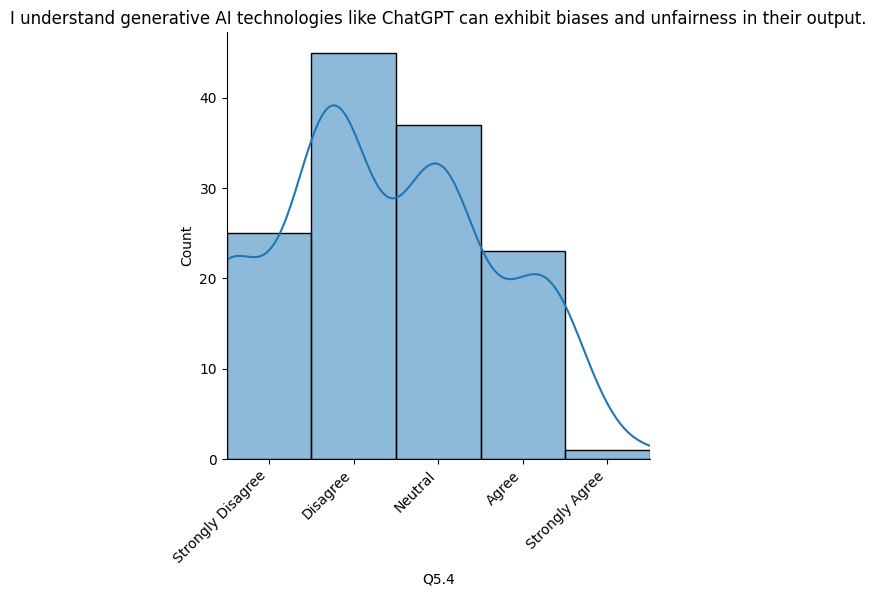

count    131.000000
mean       3.175573
std        0.940384
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q5.5, dtype: float64


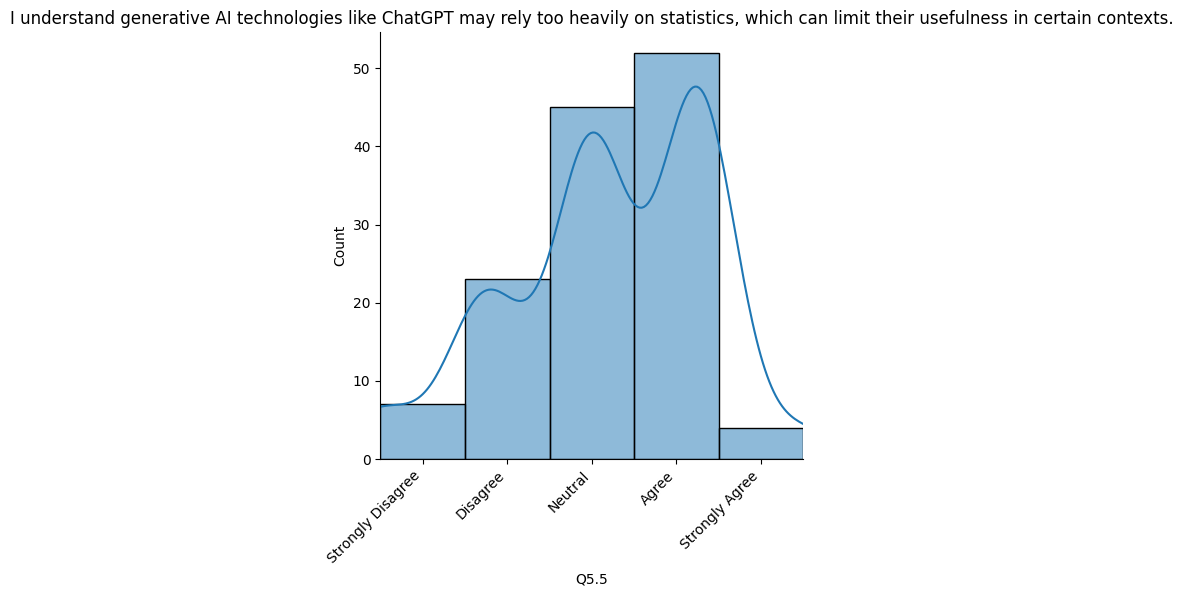

count    131.000000
mean       3.366412
std        1.138191
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q5.6, dtype: float64


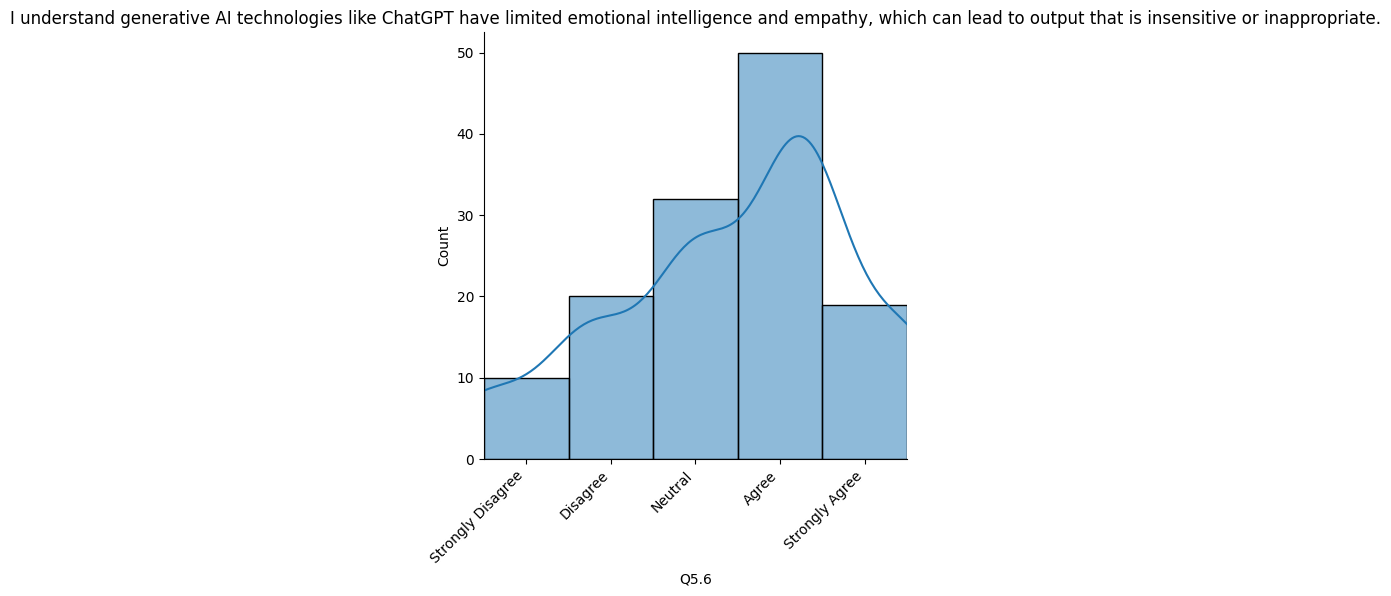

In [44]:
generate_distplot_text( survey_coded["Q5.1"], agreement_text_responses, 5, "I understand generative AI technologies like ChatGPT have limitations in their ability to handle complex tasks." )
generate_distplot_text( survey_coded["Q5.2"], agreement_text_responses, 5, "I understand generative AI technologies like ChatGPT can generate output that is factually inaccurate." )
generate_distplot_text( survey_coded["Q5.3"], agreement_text_responses, 5, "I understand generative AI technologies like ChatGPT can generate output that is out of context or inappropriate." )
generate_distplot_text( survey_coded["Q5.4"], agreement_text_responses, 5, "I understand generative AI technologies like ChatGPT can exhibit biases and unfairness in their output." )
generate_distplot_text( survey_coded["Q5.5"], agreement_text_responses, 5, "I understand generative AI technologies like ChatGPT may rely too heavily on statistics, which can limit their usefulness in certain contexts." )
generate_distplot_text( survey_coded["Q5.6"], agreement_text_responses, 5, "I understand generative AI technologies like ChatGPT have limited emotional intelligence and empathy, which can lead to output that is insensitive or inappropriate." )

**Question 6:** Willingness to use Generative AI Technologies

count    131.000000
mean       4.061069
std        0.751979
min        2.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Q6.1, dtype: float64


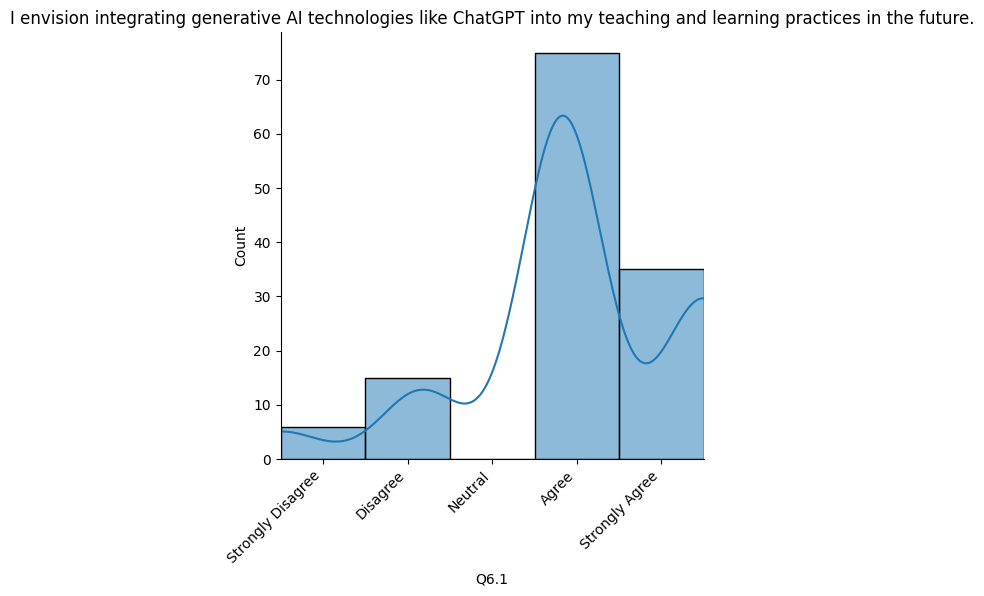

count    131.000000
mean       3.793893
std        0.974423
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q6.2, dtype: float64


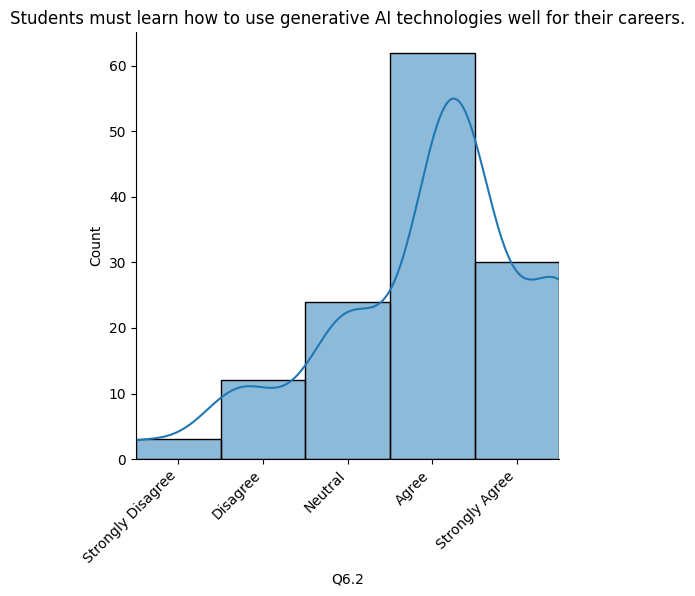

count    131.000000
mean       3.732824
std        0.875517
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q6.3, dtype: float64


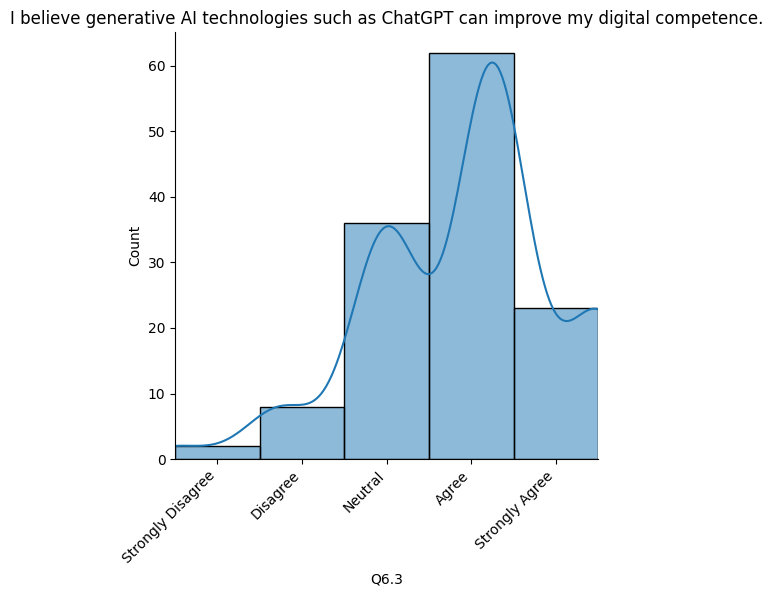

count    131.000000
mean       4.381679
std        0.684533
min        2.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Q6.4, dtype: float64


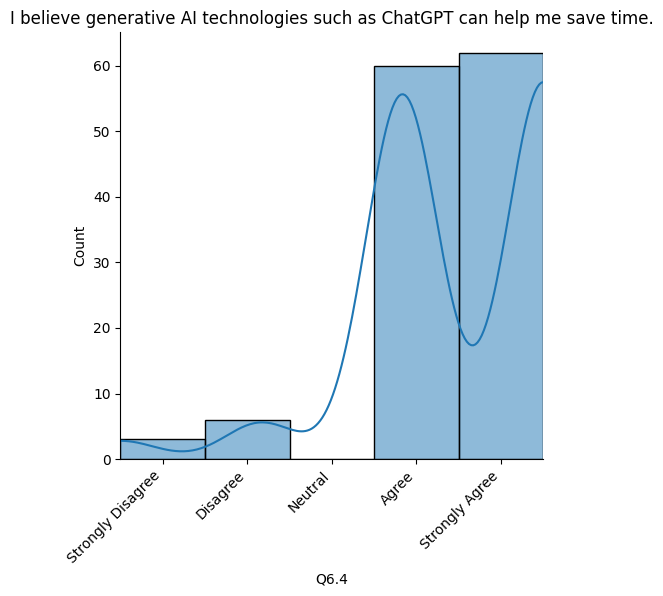

count    131.000000
mean       3.847328
std        0.881199
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q6.5, dtype: float64


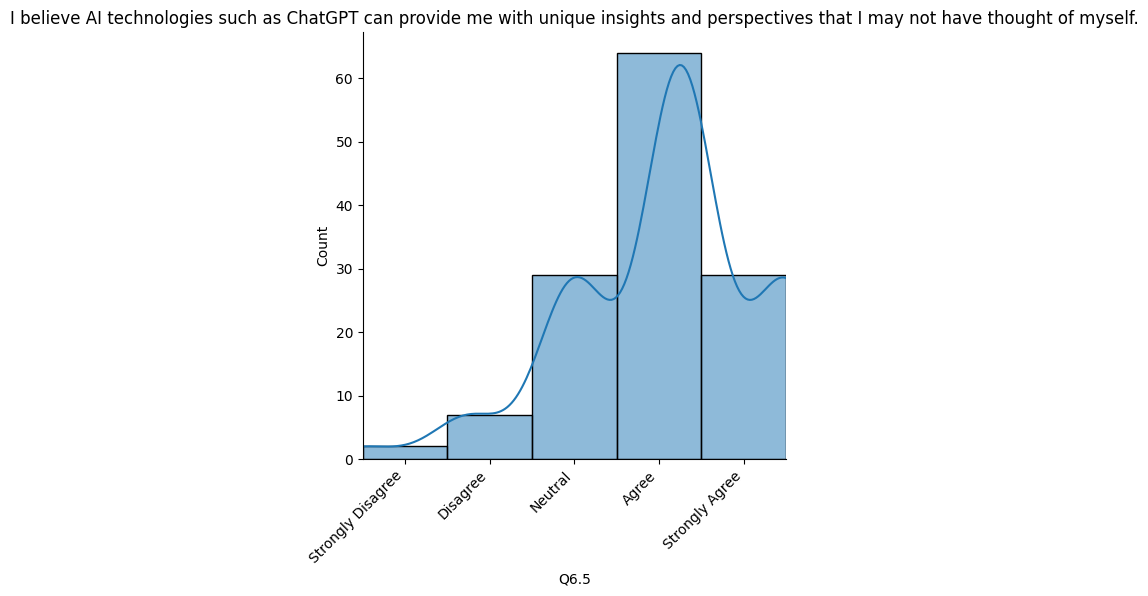

count    131.000000
mean       3.862595
std        0.772243
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q6.6, dtype: float64


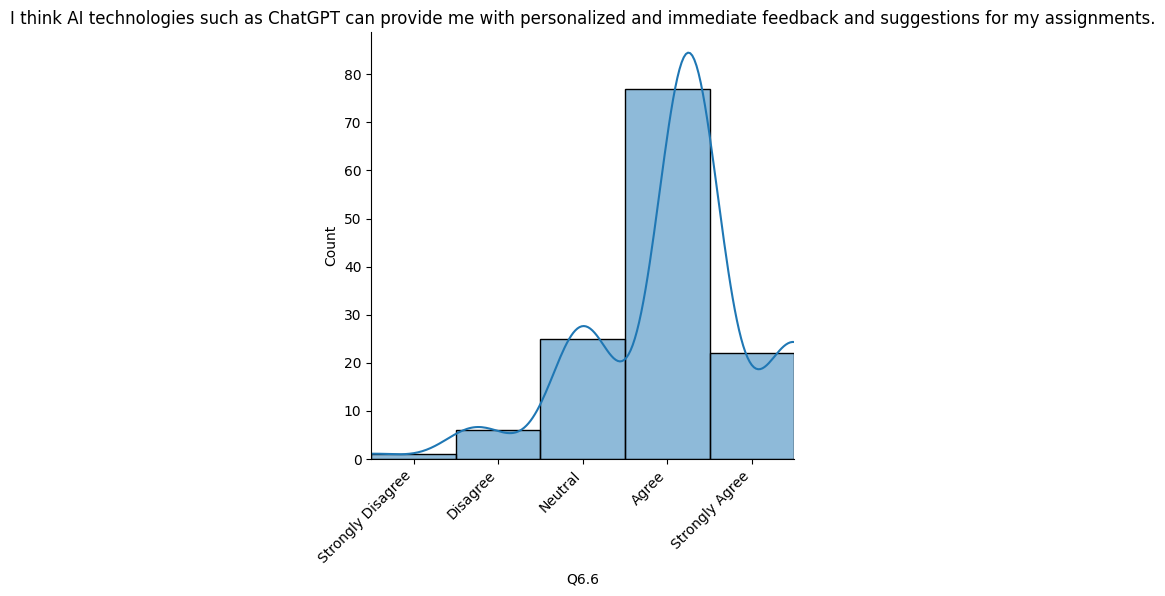

count    131.000000
mean       4.259542
std        0.780412
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Q6.7, dtype: float64


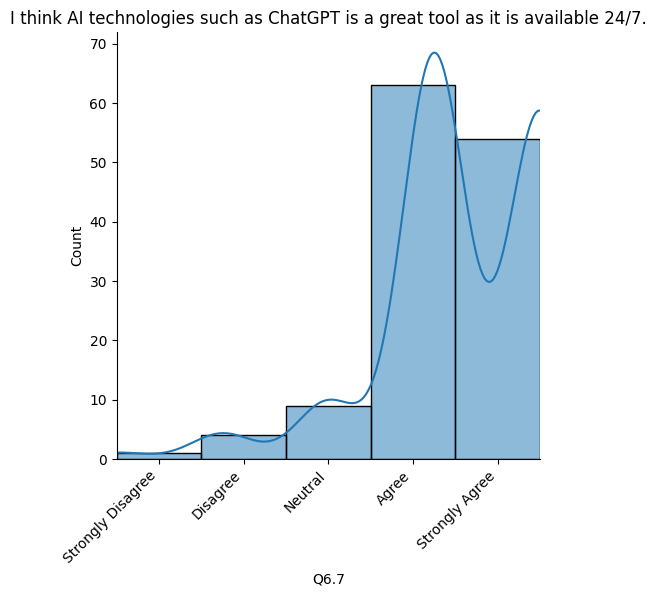

count    131.000000
mean       3.977099
std        0.769272
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q6.8, dtype: float64


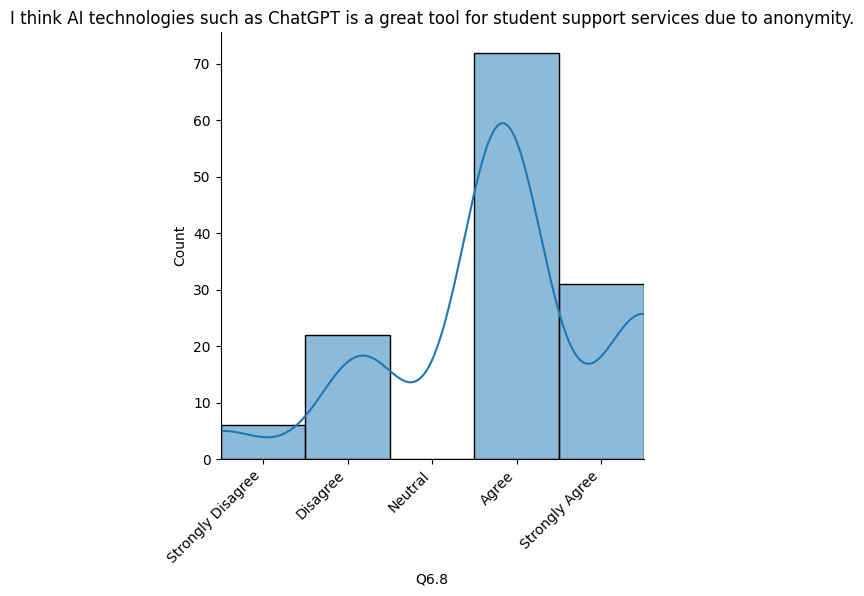

In [46]:
generate_distplot_text( survey_coded["Q6.1"], agreement_text_responses, 5, "I envision integrating generative AI technologies like ChatGPT into my teaching and learning practices in the future." )
generate_distplot_text( survey_coded["Q6.2"], agreement_text_responses, 5, "Students must learn how to use generative AI technologies well for their careers." )
generate_distplot_text( survey_coded["Q6.3"], agreement_text_responses, 5, "I believe generative AI technologies such as ChatGPT can improve my digital competence." )
generate_distplot_text( survey_coded["Q6.4"], agreement_text_responses, 5, "I believe generative AI technologies such as ChatGPT can help me save time." )
generate_distplot_text( survey_coded["Q6.5"], agreement_text_responses, 5, "I believe AI technologies such as ChatGPT can provide me with unique insights and perspectives that I may not have thought of myself." )
generate_distplot_text( survey_coded["Q6.6"], agreement_text_responses, 5, "I think AI technologies such as ChatGPT can provide me with personalized and immediate feedback and suggestions for my assignments." )
generate_distplot_text( survey_coded["Q6.7"], agreement_text_responses, 5, "I think AI technologies such as ChatGPT is a great tool as it is available 24/7." )
generate_distplot_text( survey_coded["Q6.8"], agreement_text_responses, 5, "I think AI technologies such as ChatGPT is a great tool for student support services due to anonymity." )

**Question 7:** Concerns about Generative AI Technologies

count    131.000000
mean       3.213740
std        1.074227
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q7.1, dtype: float64


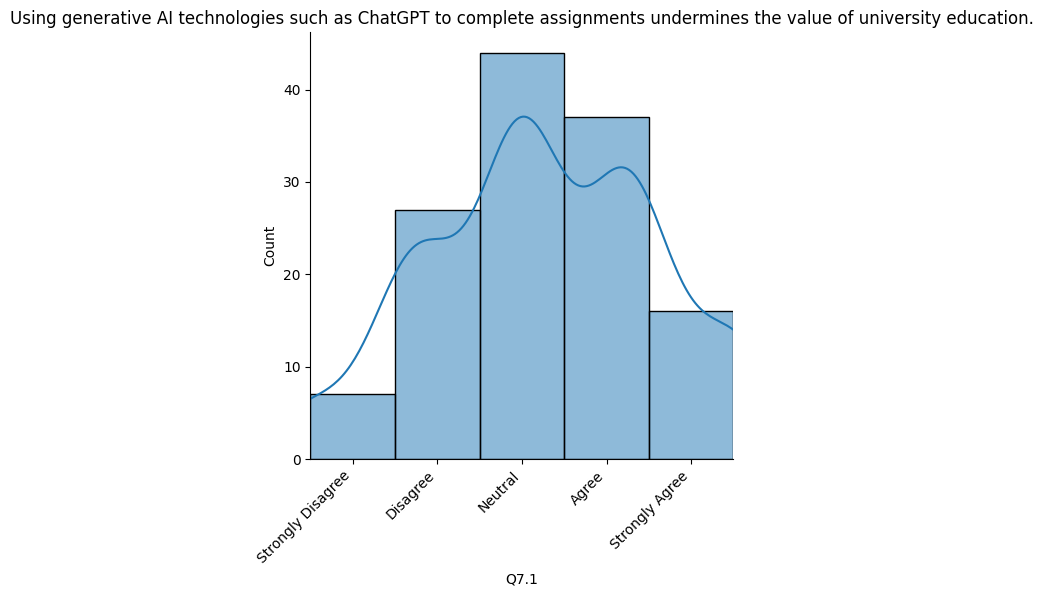

count    131.000000
mean       3.282443
std        1.178492
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q7.2, dtype: float64


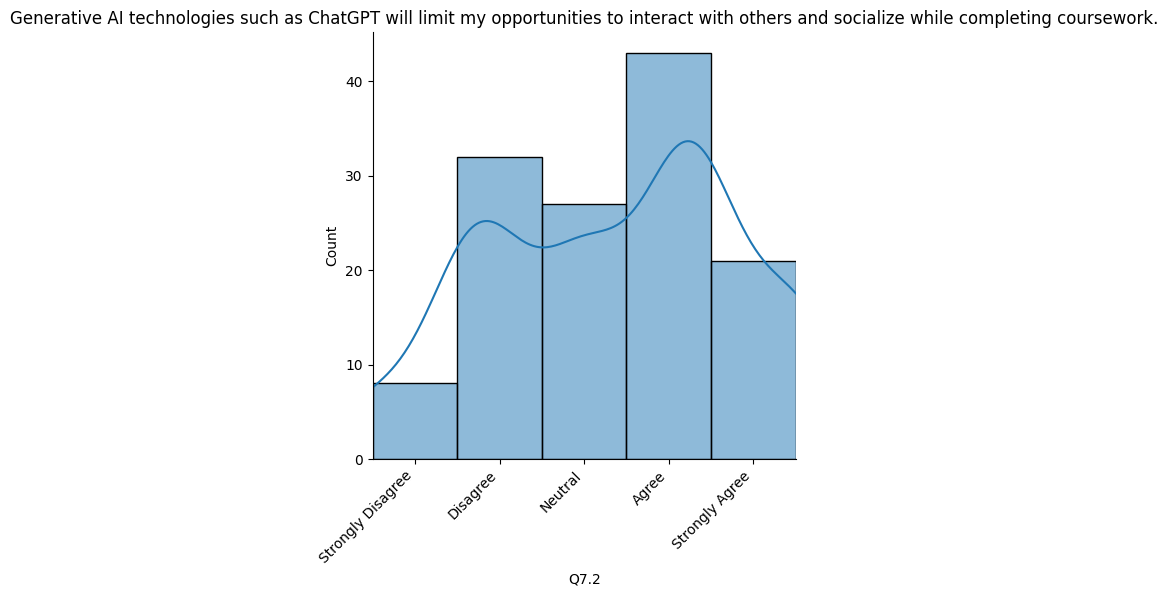

count    131.000000
mean       3.320611
std        1.204269
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q7.3, dtype: float64


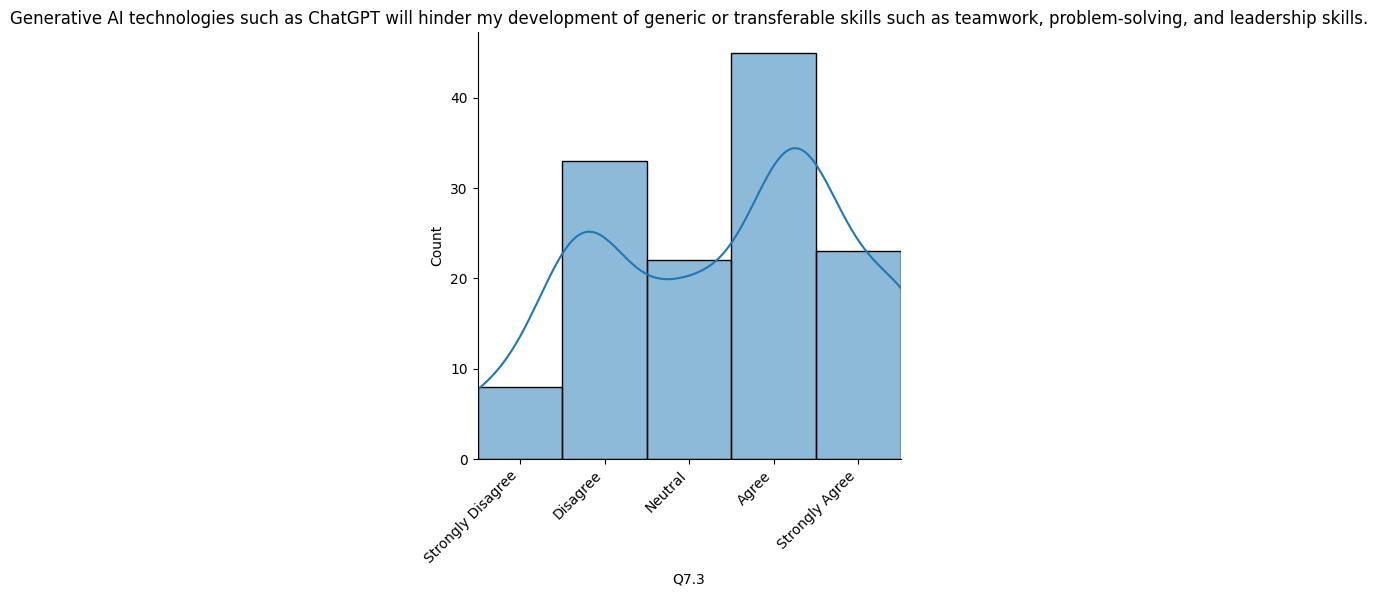

count    131.000000
mean       3.190840
std        1.330786
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q7.4, dtype: float64


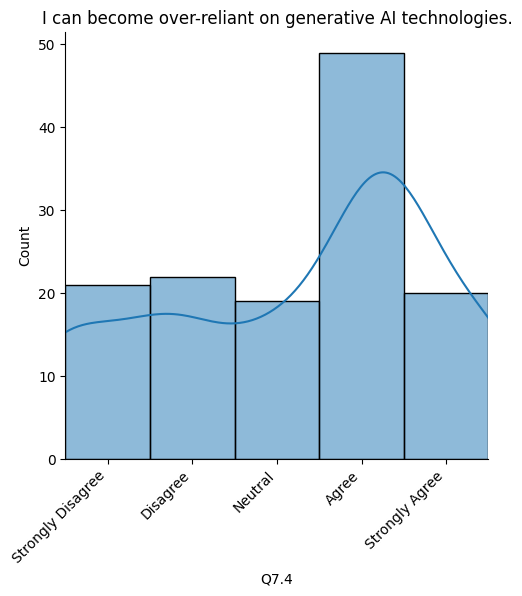

In [47]:
generate_distplot_text( survey_coded["Q7.1"], agreement_text_responses, 5, "Using generative AI technologies such as ChatGPT to complete assignments undermines the value of university education." )
generate_distplot_text( survey_coded["Q7.2"], agreement_text_responses, 5, "Generative AI technologies such as ChatGPT will limit my opportunities to interact with others and socialize while completing coursework." )
generate_distplot_text( survey_coded["Q7.3"], agreement_text_responses, 5, "Generative AI technologies such as ChatGPT will hinder my development of generic or transferable skills such as teamwork, problem-solving, and leadership skills." )
generate_distplot_text( survey_coded["Q7.4"], agreement_text_responses, 5, "I can become over-reliant on generative AI technologies." )

**Question 8:** Benefits related to Generative AI Technologies

count    131.000000
mean       3.877863
std        0.850546
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q8.1, dtype: float64


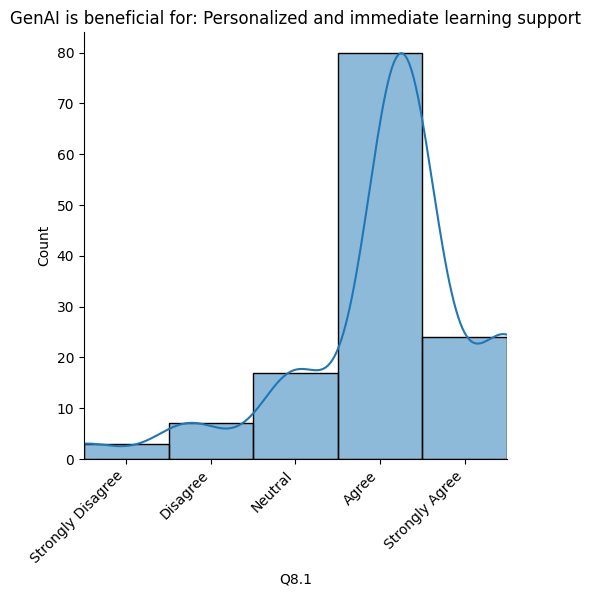

count    131.000000
mean       3.931298
std        0.805661
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q8.2, dtype: float64


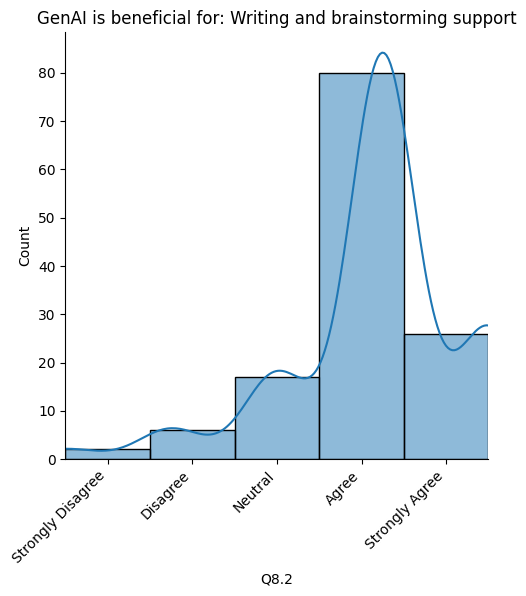

count    131.000000
mean       3.931298
std        0.842988
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q8.3, dtype: float64


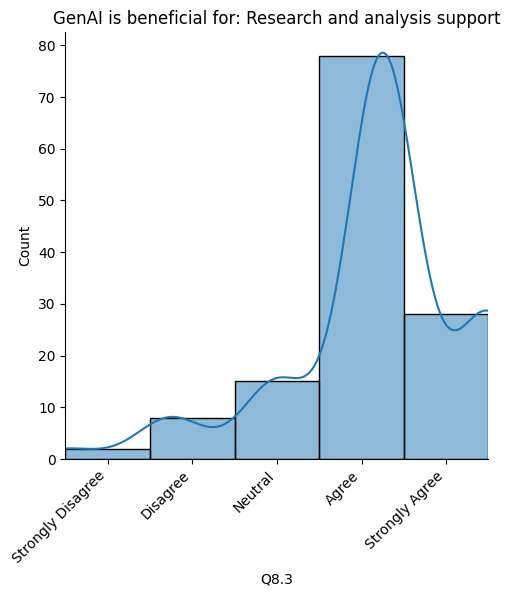

count    131.000000
mean       3.274809
std        0.969166
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q8.4, dtype: float64


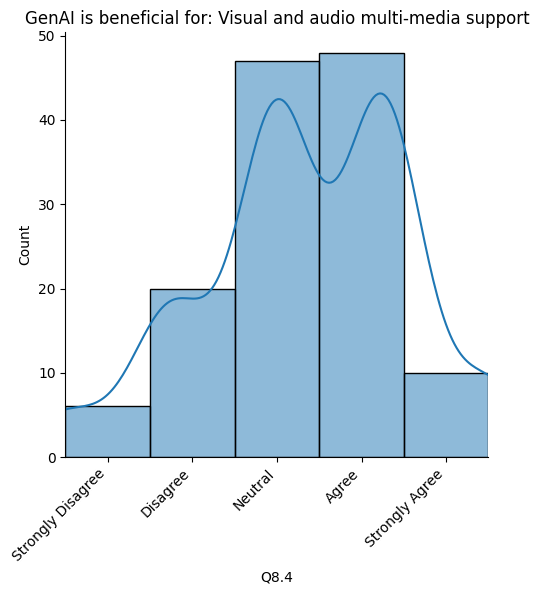

count    131.000000
mean       3.389313
std        0.855503
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q8.5, dtype: float64


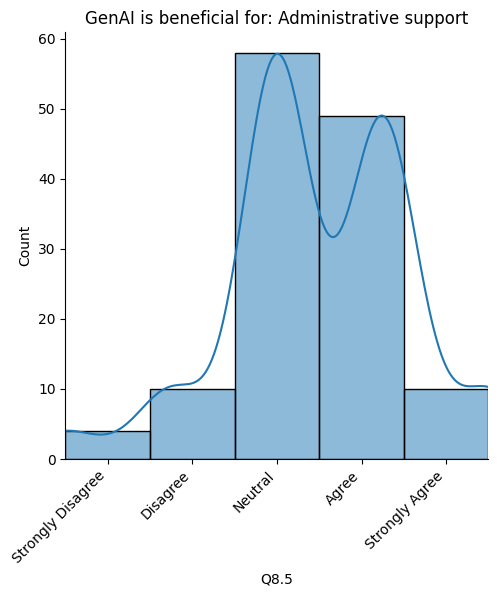

In [51]:
generate_distplot_text( survey_coded["Q8.1"], agreement_text_responses, 5, "GenAI is beneficial for: Personalized and immediate learning support" )
generate_distplot_text( survey_coded["Q8.2"], agreement_text_responses, 5, "GenAI is beneficial for: Writing and brainstorming support" )
generate_distplot_text( survey_coded["Q8.3"], agreement_text_responses, 5, "GenAI is beneficial for: Research and analysis support" )
generate_distplot_text( survey_coded["Q8.4"], agreement_text_responses, 5, "GenAI is beneficial for: Visual and audio multi-media support" )
generate_distplot_text( survey_coded["Q8.5"], agreement_text_responses, 5, "GenAI is beneficial for: Administrative support" )

**Question 9:** Challenges concerning Generative AI Technologies

count    131.000000
mean       3.412214
std        0.821539
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q9.1, dtype: float64


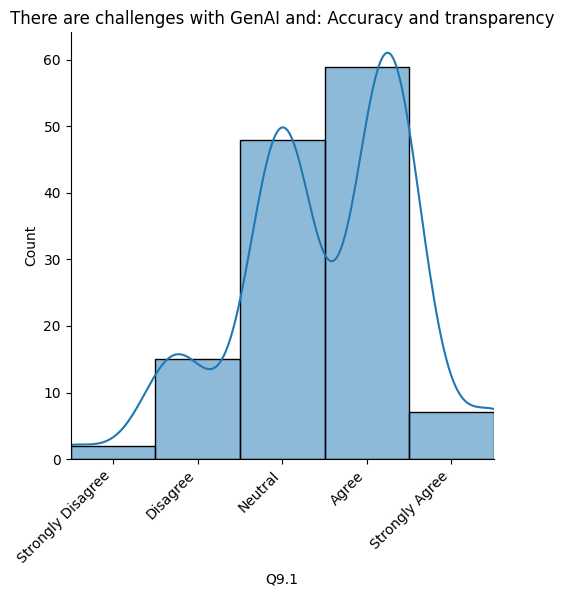

count    131.000000
mean       3.488550
std        0.914553
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Q9.2, dtype: float64


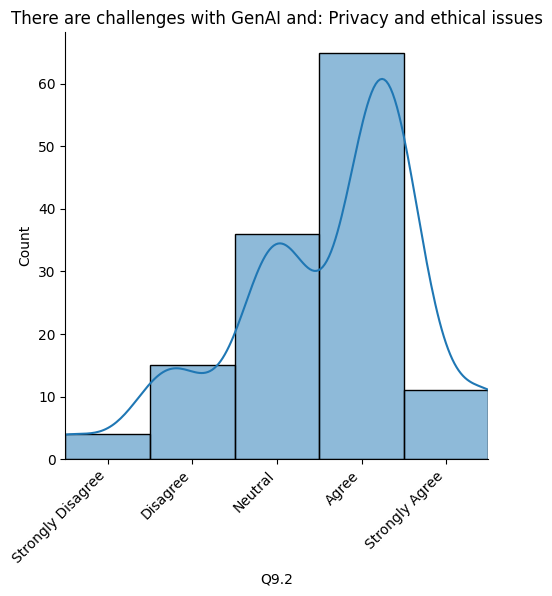

count    131.000000
mean       3.221374
std        0.693820
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q9.3, dtype: float64


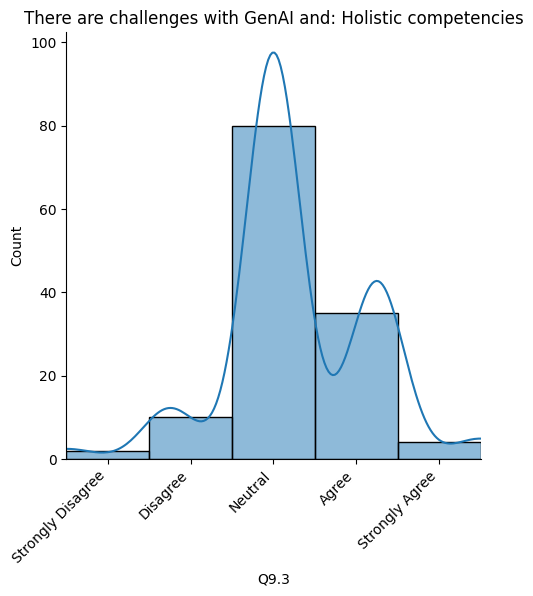

count    131.000000
mean       3.259542
std        0.965464
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q9.4, dtype: float64


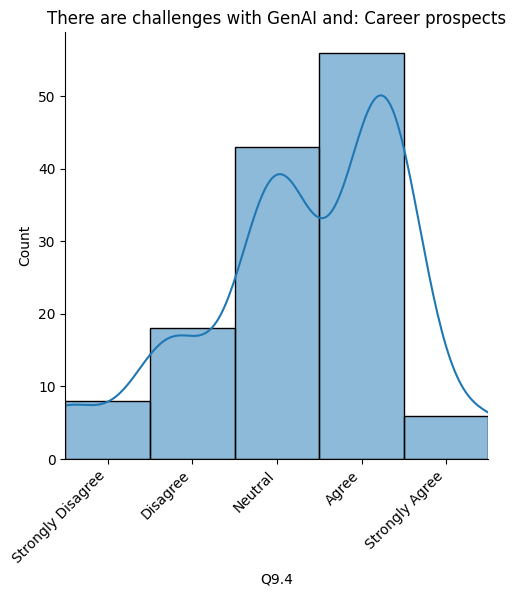

count    131.000000
mean       3.061069
std        0.982585
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q9.5, dtype: float64


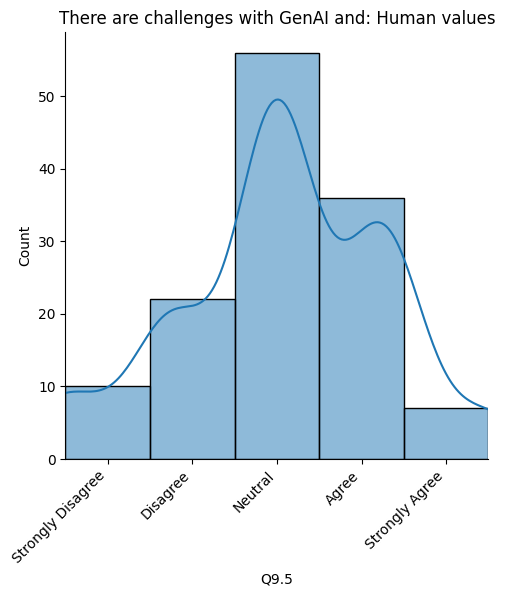

In [52]:
generate_distplot_text( survey_coded["Q9.1"], agreement_text_responses, 5, "There are challenges with GenAI and: Accuracy and transparency" )
generate_distplot_text( survey_coded["Q9.2"], agreement_text_responses, 5, "There are challenges with GenAI and: Privacy and ethical issues" )
generate_distplot_text( survey_coded["Q9.3"], agreement_text_responses, 5, "There are challenges with GenAI and: Holistic competencies" )
generate_distplot_text( survey_coded["Q9.4"], agreement_text_responses, 5, "There are challenges with GenAI and: Career prospects" )
generate_distplot_text( survey_coded["Q9.5"], agreement_text_responses, 5, "There are challenges with GenAI and: Human values" )